<a href="https://colab.research.google.com/github/honeyd3wy/PyTorch/blob/master/ai_sc13x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC13x Linear Algebra

## 1. $\vec{c} \cdot \vec{d}$ 를 구해보세요. 이 두 개의 vector는 orthogonal 관계 (직교)에 있나요? 왜 그런가요? 왜 아닌가요?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [19]:
import numpy as np
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

np.dot(c, d)

42

In [22]:
c1 = np.array([[3], [7], [-2], [12]])
d1 = np.array([[9], [-7], [4], [6]])
np.dot(c1, d1)

ValueError: ignored

두 벡터의 내적이 0이 아니므로 둘은 직교에 있지 않다.

## 2. $E^{-1}$ 와 $E^{T}$ 를 구하세요.

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [2]:
e = np.array([[7,4,2],
              [1,3,-1],
              [2,6,-4]])

# 역행렬을 구할 수 있는지 판단
np.linalg.det(e)

-34.00000000000001

In [3]:
# 역행렬
e_inv = np.linalg.inv(e)

# 전치행렬
e_trs = e.T

print("역행렬: \n", e_inv)
print("\n")
print("전치행렬: \n", e_trs)

역행렬: 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


전치행렬: 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


## 3. $|F|$ 를 구하세요. 이 데이터는 어떤 의미가 있나요?

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [4]:
import numpy as np
f = np.array([[ 2, -2, 5],
              [4, 1, 10],
              [12, 6, 30]])
np.linalg.det(f)

0.0

F의 행렬식값은 0이므로, F는 역행렬이 존재하지 않는다.

행렬식은 정사각행렬에 수를 대응시키는 함수의 하나로, 정사각행렬이 나타내는 선형변환이 부피를 확대시키는 정도이다.

행렬식 값이 0이라는 것은 이 행렬을 구성하는 벡터가 서로 동일선상에 있다는 것을 의미한다.

## 4. 다음 데이터의 covariance, correlation을 구하세요.

- x = [820, 760, 1250, 990, 1080, 1450, 1600]

- y = [0, 1, 7, 1, 0, 6, 4]

In [5]:
x = np.array([820, 760, 1250, 990, 1080, 1450, 1600])
y = np.array([0, 1, 7, 1, 0, 6, 4])

cov = np.cov(x, y)[0, 1]
corr = np.corrcoef(x, y)[0, 1]

print("covariance: ", cov)
print("correlation: ", corr)

covariance:  670.2380952380952
correlation:  0.7284634644730714


## 5. 다음 데이터를 정규화 하세요.

아래 링크를 참조하세요.

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [6]:
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [7]:
header = df.columns.tolist()
numeric_header = header[1:]

from sklearn.preprocessing import StandardScaler
numeric_data = df[numeric_header]
categorical_data = df['Country']

std_df = pd.DataFrame(StandardScaler().fit_transform(numeric_data), columns=numeric_header)
std_df

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 6. 위 데이터에 PCA 를 적용 후 scatterplot을 그리세요.

In [8]:
# PCA with scaled data
from sklearn.decomposition import PCA

pca = PCA(4)
pc_data = pca.fit_transform(std_df)
ratio = pca.explained_variance_ratio_

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
print("\n variances ratio: \n", ratio)


 Eigenvectors: 
 [[-0.24572131  0.28562914 -0.26481055 -0.28611787 -0.12719487 -0.2811012
   0.09775901 -0.26544997 -0.28708628 -0.12073819 -0.25767815 -0.27890521
  -0.17843996 -0.27747513  0.22771961 -0.25509484 -0.25275834]
 [ 0.24708041 -0.07716993  0.13610704 -0.01100602 -0.40054501 -0.13684092
  -0.45468785 -0.0964863  -0.09282322  0.41036129 -0.1539603   0.08174644
  -0.32902948 -0.13773847  0.29323981  0.23231808  0.21105701]
 [ 0.18723888  0.15327713 -0.30439545  0.20499304 -0.34010234 -0.05073161
  -0.11338943  0.35064519  0.07333507 -0.32037834  0.33340494  0.2428402
  -0.38616448 -0.14839777 -0.17168328 -0.11736728 -0.24529742]
 [ 0.02196958 -0.77105819 -0.52488165 -0.16541733 -0.18373907  0.09843172
   0.02503024  0.06022834  0.06782655  0.01963462 -0.03654902 -0.13677752
   0.12775703 -0.03912885  0.08170022 -0.0562769  -0.04117441]]

 Eigenvalues: 
 [1.54876508e+01 5.63749203e+00 1.54152380e+00 5.50234212e-32]

 variances ratio: 
 [6.83278713e-01 2.48712884e-01 6.800840

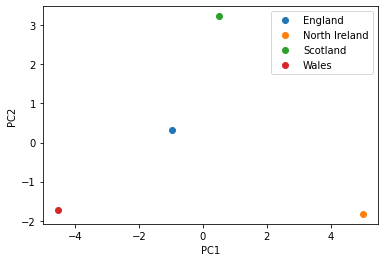

In [9]:
# 시각화
# 시각화를 위한 전처리
pc_df = pd.DataFrame(pc_data, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pc_df = pd.concat([pc_df, df['Country']], axis = 1) ## concate_by_column
pc_df

# Scatter plot with a different color by groups
import matplotlib.pyplot as plt

groups = pc_df.groupby('Country')

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.PC1, 
            group.PC2,
            marker='o',
            linestyle='',
            label=name)
ax.legend(fontsize=10) # legend position
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 7. 아래 데이터에 대해 k-means clustering을 적용 후, 결과를 그래프로 그리세요.



In [10]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [11]:
points.shape

(200, 2)

In [12]:
header = points.columns.tolist()

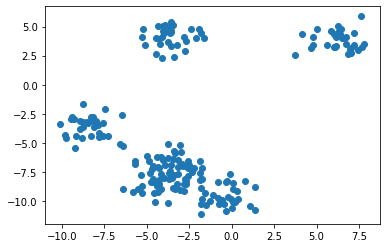

In [13]:
plt.scatter(points['x'], points['y'])
plt.show()

시각적으로 대강 5개의 그룹으로 나뉘므로 n_components = 5로 설정한다.

In [14]:
# 표준화
std_points = pd.DataFrame(StandardScaler().fit_transform(points), columns=header)

# k-means clustering
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans.fit(std_points)
labels = kmeans.labels_

# df에 clustering결과값과 원래 label 붙이기
new_series = pd.Series(labels)
points['clusters'] = new_series.values
points

,x,y,clusters
0,-7.846803,-3.421277,2
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,4
3,-6.401456,-5.223972,2
4,-0.804026,-9.704457,4
...,...,...,...
195,-3.560689,4.567320,3
196,5.051216,4.745086,0
197,6.127624,4.285188,0
198,-1.783078,-8.890394,4


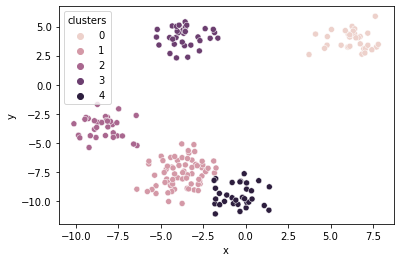

In [15]:
# Scatter plot by Groups
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='x', 
                y='y', 
                hue='clusters', # different colors by group
                data=points)
plt.show()

# SC 3점 요구사항:
위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들 중 하나를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 optional 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- 6번의 PCA 결과에 대해서 Scree plot을 추가하세요.

- 7번에서 k값을 선택하는 과정을 논리적으로 설명하세요.


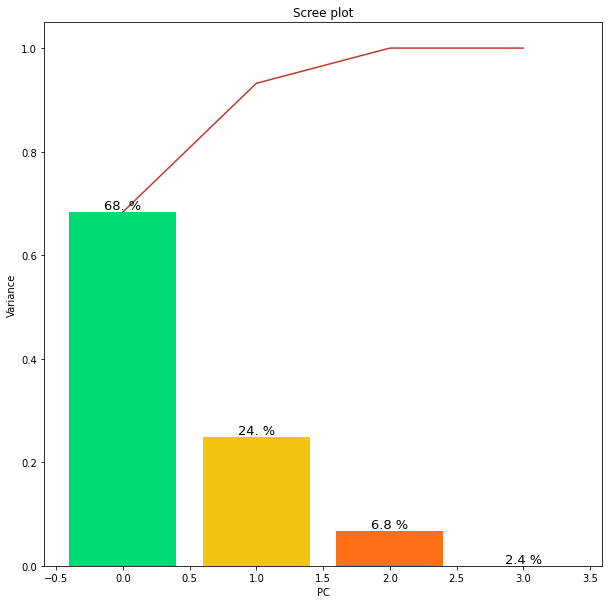

In [16]:
# 6번 PCA 결과의 Scree plot

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import decomposition

# scree plot 그리기
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    plt.rcParams['figure.figsize'] = [10,10]
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s %%" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pca)